# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print('Beginning Data Retrieval\n-----------------------------')
n=0
s=1
data_dict={}
base_url='https://api.openweathermap.org/data/2.5/weather?'
for i in cities:
    try:
        city_name=i
        
        #get weather data for city
        url=base_url+f'q={city_name}&units=imperial&appid={weather_api_key}'
        data_json=requests.get(url).json()
        
        #focus on certain features
        lon=float((data_json['coord']['lon']))
        lat=float((data_json['coord']['lat']))
        temperature=float(data_json['main']['temp_max'])
        humidity=float(data_json['main']['humidity'])
        cloudiness=float(data_json['clouds']['all'])
        wind_speed=float(data_json['wind']['speed'])
        country=data_json['sys']['country']
        date=float(data_json['dt'])
        data_dict.update({city_name:[lat,lon,temperature,humidity,cloudiness,wind_speed,country,date]})
        
        #assign every 50 records to one set
        n+=1
        if n>50:
            n=1
            s+=1
            print(f'Processing Record {n} of Set {s} | {i}')
        else:
            print(f'Processing Record {n} of Set {s} | {i}')
    except:
        print(f'City not found. Skipping...')
        pass


print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | aswan
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 5 of Set 1 | bambous virieux
City not found. Skipping...
Processing Record 6 of Set 1 | timra
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | kapit
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | savelugu
City not found. Skipping...
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | mitsamiouli
Processing Record 14 of Set 1 | honiara
City not found. Skipping...
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | manokwari
Processing Record 17 of Set 1 | hermanus
City not found. Skipping...
Processing Record 18 of Set 1 | tessalit
Processing Record 19 of Set 1 | verkhnevilyuysk
Processing Record 20 of Set 1 | pe

City not found. Skipping...
Processing Record 38 of Set 4 | margate
City not found. Skipping...
Processing Record 39 of Set 4 | constitucion
Processing Record 40 of Set 4 | jiuquan
Processing Record 41 of Set 4 | vestmannaeyjar
City not found. Skipping...
Processing Record 42 of Set 4 | ulefoss
Processing Record 43 of Set 4 | ballina
Processing Record 44 of Set 4 | illapel
Processing Record 45 of Set 4 | dingle
Processing Record 46 of Set 4 | mustasaari
Processing Record 47 of Set 4 | saskylakh
Processing Record 48 of Set 4 | santa fe
Processing Record 49 of Set 4 | ust-maya
Processing Record 50 of Set 4 | derzhavinsk
Processing Record 1 of Set 5 | eureka
City not found. Skipping...
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | itapirapua
Processing Record 4 of Set 5 | noumea
Processing Record 5 of Set 5 | port augusta
Processing Record 6 of Set 5 | bambanglipuro
Processing Record 7 of Set 5 | poum
City not found. Skipping...
City not found. Skipping...
Process

Processing Record 25 of Set 8 | lavrentiya
Processing Record 26 of Set 8 | encarnacion
City not found. Skipping...
Processing Record 27 of Set 8 | luanda
Processing Record 28 of Set 8 | vanimo
City not found. Skipping...
Processing Record 29 of Set 8 | penzance
Processing Record 30 of Set 8 | betioky
Processing Record 31 of Set 8 | isangel
Processing Record 32 of Set 8 | barahona
Processing Record 33 of Set 8 | zakamensk
Processing Record 34 of Set 8 | madimba
Processing Record 35 of Set 8 | dukat
Processing Record 36 of Set 8 | luderitz
Processing Record 37 of Set 8 | hamilton
Processing Record 38 of Set 8 | koygorodok
Processing Record 39 of Set 8 | areosa
Processing Record 40 of Set 8 | bilibino
City not found. Skipping...
Processing Record 41 of Set 8 | mayo
Processing Record 42 of Set 8 | apostolove
Processing Record 43 of Set 8 | ouallam
Processing Record 44 of Set 8 | dhidhdhoo
Processing Record 45 of Set 8 | utica
Processing Record 46 of Set 8 | lamu
Processing Record 47 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df=pd.DataFrame(data_dict).T
df.reset_index(inplace=True)
df.columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']

In [5]:
#export into a csv
df.to_csv("weather_data.csv")

In [6]:
df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [7]:
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aswan,24.09,32.91,91.74,18,0,11.97,EG,1.59571e+09
1,puerto ayora,-0.74,-90.35,68,94,86,5.01,EC,1.59571e+09
2,rikitea,-23.12,-134.97,70.07,80,18,22.62,PF,1.59571e+09
3,petropavlovsk-kamchatskiy,53.05,158.65,59,82,100,6.71,RU,1.59571e+09
4,bambous virieux,-20.34,57.76,69.01,56,75,14.99,MU,1.59571e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].astype(float).describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,20.650178,20.489234,69.072906,71.511586,50.901961,7.930107,1.595715e+09
std,33.407356,90.661629,13.973863,20.667183,38.890864,5.756055,8.031822e+01
min,-54.800000,-179.170000,30.200000,1.000000,0.000000,0.220000,1.595714e+09
25%,-6.880000,-59.430000,57.600000,60.000000,7.000000,3.830000,1.595715e+09
50%,25.380000,23.620000,71.600000,77.000000,52.000000,6.620000,1.595715e+09
75%,49.780000,101.370000,79.300000,88.000000,90.000000,11.010000,1.595715e+09
max,78.220000,179.320000,101.890000,100.000000,100.000000,55.990000,1.595715e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
df.index[df['Humidity']>100]

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
data=df[['Lat','Max Temp']]
data.head()

,Lat,Max Temp
0,24.09,91.74
1,-0.74,68
2,-23.12,70.07
3,53.05,59
4,-20.34,69.01


Text(0, 0.5, 'Max Temperature (F)')

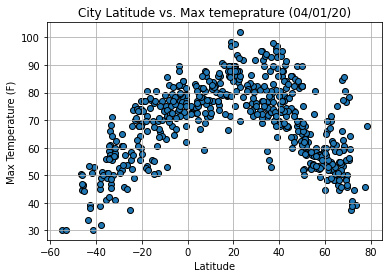

In [13]:
#plot graphic
plt.scatter(data['Lat'],data['Max Temp'],edgecolors='black')
plt.grid()
plt.title('City Latitude vs. Max temeprature (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')


## Latitude vs. Humidity Plot

In [14]:
data=df[['Lat','Humidity']]
data.head()

,Lat,Humidity
0,24.09,18
1,-0.74,94
2,-23.12,80
3,53.05,82
4,-20.34,56


Text(0.5, 0, 'Latitude')

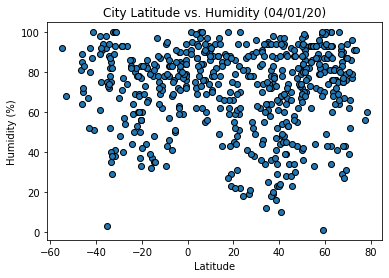

In [15]:
plt.scatter(data['Lat'],data['Humidity'],edgecolors='black')
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

## Latitude vs. Cloudiness Plot

In [16]:
data=df[['Lat','Cloudiness']]
data.head()

,Lat,Cloudiness
0,24.09,0
1,-0.74,86
2,-23.12,18
3,53.05,100
4,-20.34,75


Text(0.5, 0, 'Latitude')

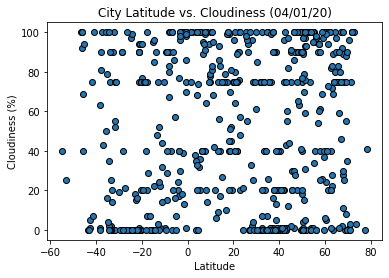

In [17]:
plt.scatter(data['Lat'],data['Cloudiness'],edgecolors='black')
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

## Latitude vs. Wind Speed Plot

In [18]:
data=df[['Lat','Wind Speed']]
data.head()

,Lat,Wind Speed
0,24.09,11.97
1,-0.74,5.01
2,-23.12,22.62
3,53.05,6.71
4,-20.34,14.99


Text(0.5, 0, 'Latitude')

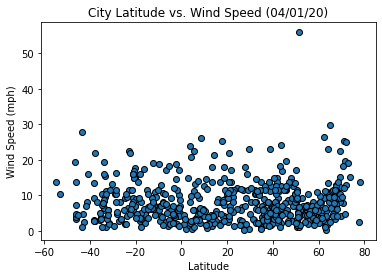

In [19]:
plt.scatter(data['Lat'],data['Wind Speed'],edgecolors='black')
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

## Linear Regression

In [47]:
# OPTIONAL: Create a function to create Linear Regression plots

In [21]:
def liner_reg_func(x,y):
    
    global x_value #for reg_annot usage
    global y_value #for reg_annot usage
    
    x_value=x
    y_value=y
    
    plt.scatter(x=x_value,y=y_value)
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    

def reg_annot(loc):
    
    slope, intercept, r_value, p_value, std_err = linregress(x_value,y_value)
    regress_values=x_value*slope+intercept
    
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}',xy=loc,fontsize=15,color='r')
    print(f'The r-squared is: {r_value**2}')

In [22]:
# Create Northern and Southern Hemisphere DataFrames

In [56]:
df_ns=df.copy()
df_ns['NS']=['N' if i>0 else 'S' for i in df_ns['Lat']]
df_ns.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,NS
0,aswan,24.09,32.91,91.74,18,0,11.97,EG,1.59571e+09,N
1,puerto ayora,-0.74,-90.35,68,94,86,5.01,EC,1.59571e+09,S
2,rikitea,-23.12,-134.97,70.07,80,18,22.62,PF,1.59571e+09,S
3,petropavlovsk-kamchatskiy,53.05,158.65,59,82,100,6.71,RU,1.59571e+09,N
4,bambous virieux,-20.34,57.76,69.01,56,75,14.99,MU,1.59571e+09,S


In [57]:
df_ns.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date', 'NS'],
      dtype='object')

In [68]:
df_ns[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Date']]=df_ns[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Date']].astype('float32')

In [69]:
df_n=df_ns[df_ns['NS']=='N']
df_s=df_ns[df_ns['NS']=='S']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.43000080826136


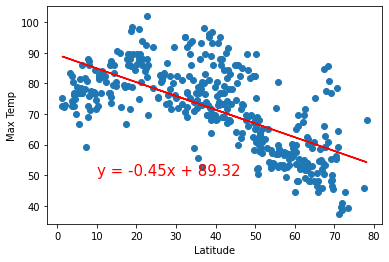

In [72]:
liner_reg_func(df_n['Lat'],df_n['Max Temp'])
reg_annot((10,50))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6400753011967897


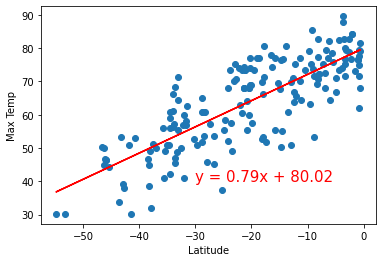

In [73]:
liner_reg_func(df_s['Lat'],df_s['Max Temp'])
reg_annot((-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 2.562140958487542e-06


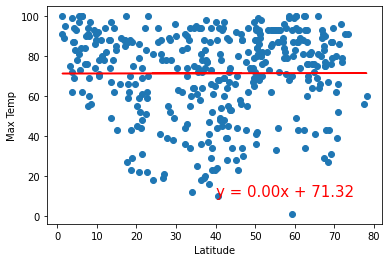

In [74]:
liner_reg_func(df_n['Lat'],df_n['Humidity'])
reg_annot((40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00034818446526063636


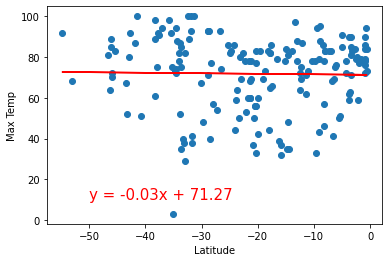

In [75]:
liner_reg_func(df_s['Lat'],df_s['Humidity'])
reg_annot((-50,10))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0024569751997076637


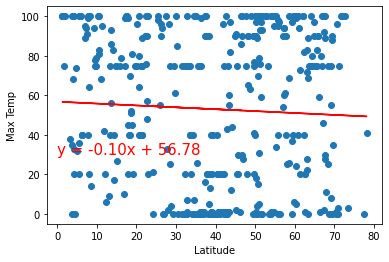

In [76]:
liner_reg_func(df_n['Lat'],df_n['Cloudiness'])
reg_annot((0,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.019057810435686186


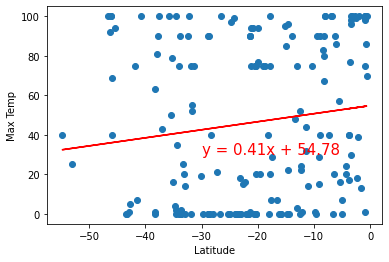

In [77]:
liner_reg_func(df_s['Lat'],df_s['Cloudiness'])
reg_annot((-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0054150629879599


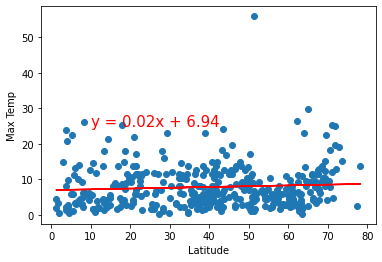

In [78]:
liner_reg_func(df_n['Lat'],df_n['Wind Speed'])
reg_annot((10,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008058290580207869


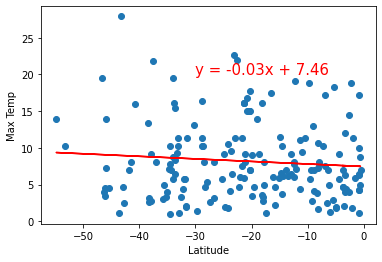

In [79]:
liner_reg_func(df_s['Lat'],df_s['Wind Speed'])
reg_annot((-30,20))